<a href="https://colab.research.google.com/github/ac-26/skill-categorization/blob/main/skill_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
from itertools import permutations
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords.words('english')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [64]:
# Defining random skill categories
categories = {
    "Technical Skills": ["Python", "Java", "JavaScript", "C++", "C#", "Swift", "Go", "Kotlin", "Ruby", "PHP",
                         "TypeScript", "Rust", "Dart", "Scala", "Perl", "Assembly Language", "SQL", "NoSQL", "GraphQL",
                         "HTML", "CSS", "Data Structures & Algorithms", "Object-Oriented Programming (OOP)",
                         "Functional Programming", "API Development", "RESTful Services", "Microservices Architecture",
                         "Cloud Computing (AWS, Azure, GCP)", "Docker & Kubernetes", "CI/CD Pipelines", "DevOps Practices",
                         "Linux System Administration", "Version Control (Git, GitHub, GitLab)", "Cybersecurity Principles",
                         "Blockchain Development", "Machine Learning & AI", "Deep Learning Frameworks (TensorFlow, PyTorch)",
                         "Data Engineering (ETL, Apache Spark)", "Big Data Technologies (Hadoop, Kafka)", "Computer Vision",
                         "Natural Language Processing (NLP)", "Internet of Things (IoT)", "Embedded Systems Development",
                         "Mobile App Development (Android, iOS)", "Web Development (Frontend & Backend)", "Game Development (Unity, Unreal Engine)",
                         "Quantum Computing Basics", "Augmented & Virtual Reality (AR/VR)", "Software Testing & Automation",
                         "Penetration Testing & Ethical Hacking"],

    "Data & Analytical Skills": ["Data Analysis", "Data Mining", "Data Visualization", "Machine Learning", "Deep Learning",
                        "NLP (Natural Language Processing)", "Computer Vision", "Statistical Modeling", "Data Cleaning & Preprocessing",
                        "Feature Engineering", "Exploratory Data Analysis (EDA)", "Hypothesis Testing", "Predictive Analytics",
                        "Time Series Analysis", "A/B Testing", "Model Evaluation & Validation", "Supervised Learning",
                        "Unsupervised Learning", "Reinforcement Learning", "Regression Analysis", "Classification Algorithms",
                        "Clustering Algorithms", "Decision Trees & Random Forests", "Support Vector Machines (SVM)",
                        "K-Nearest Neighbors (KNN)", "Neural Networks", "Dimensionality Reduction (PCA, LDA)", "Bayesian Analysis",
                        "Text Mining", "Speech Recognition", "Sentiment Analysis", "Deep Neural Networks (DNN)",
                        "Convolutional Neural Networks (CNN)", "Recurrent Neural Networks (RNN)", "Generative Adversarial Networks (GAN)",
                        "Gradient Boosting Algorithms (XGBoost, LightGBM)", "Natural Language Generation (NLG)", "Data Warehousing",
                        "Data Architecture & Modeling", "SQL for Data Analysis", "NoSQL for Data Storage", "Big Data Analysis (Hadoop, Spark)",
                        "Data Ethics & Privacy", "Cloud-Based Analytics (AWS, GCP, Azure)", "Real-Time Analytics", "Data Governance & Compliance",
                        "Dashboard Creation (Power BI, Tableau)", "Data Reporting & Presentation", "Statistical Programming (R, SAS)",
                        "Business Intelligence (BI) Tools"],

    "Business & Management Skills": ["Project Management", "Agile Methodologies", "Leadership", "Finance", "Marketing",
                        "Strategic Planning", "Team Management", "Change Management", "Risk Management", "Budgeting",
                        "Time Management", "Negotiation", "Business Development", "Sales Management", "Client Relations",
                        "Performance Management", "Conflict Resolution", "Operational Efficiency", "Process Improvement",
                        "Customer Relationship Management (CRM)", "Vendor Management", "Supply Chain Management",
                        "Resource Allocation", "Talent Acquisition", "Employee Development", "Staff Training", "Compliance Management",
                        "Mergers & Acquisitions", "Market Research", "Brand Management", "Product Development", "Product Lifecycle Management",
                        "Forecasting", "Business Analytics", "Market Segmentation", "Sales Forecasting", "Public Relations",
                        "Customer Retention", "Corporate Social Responsibility (CSR)", "Business Communication", "Stakeholder Management",
                        "Decision Making", "Problem Solving", "SWOT Analysis", "Financial Analysis", "Cash Flow Management",
                        "Fundraising", "Investor Relations", "Strategic Partnerships", "Crisis Management", "Business Process Outsourcing (BPO)"],

    "Creative Skills": ["Graphic Design", "UX/UI Design", "Video Editing", "Photography", "Illustration",
                        "Animation", "3D Modeling", "Creative Writing", "Storytelling", "Copywriting",
                        "Branding", "Typography", "Color Theory", "Visual Communication", "Art Direction",
                        "Logo Design", "Concept Art", "Motion Graphics", "Digital Painting", "Character Design",
                        "Game Design", "Sound Design", "Music Composition", "Scriptwriting", "Cinematography",
                        "Photo Manipulation", "Print Design", "User Research", "Wireframing", "Prototyping",
                        "Infographic Design", "Editorial Design", "Advertising Design", "Social Media Content Creation",
                        "Creative Problem-Solving", "Idea Generation", "Brainstorming", "Design Thinking",
                        "Experiential Design", "Environmental Design", "Interior Design", "Fashion Design",
                        "Hand Lettering", "Calligraphy", "Stop Motion Animation", "Augmented Reality (AR) Design",
                        "Virtual Reality (VR) Design", "Interactive Media", "Web Design", "Illustration for Publishing",
                        "Set Design", "Creative Direction"],

    "Soft Skills": ["Communication", "Teamwork", "Problem-Solving", "Critical Thinking", "Adaptability", "Active Listening",
                    "Verbal Communication", "Written Communication", "Public Speaking","Negotiation", "Persuasion", "Storytelling",
                    "Constructive Feedback", "Nonverbal Communication","Empathy", "Conflict Resolution", "Relationship Building",
                    "Emotional Intelligence", "Teamwork","Collaboration", "Diplomacy", "Tactfulness", "Respectfulness",
                    "Adaptability", "Decision-Making","Strategic Thinking", "Delegation", "Motivation", "Coaching & Mentoring",
                    "Accountability","Confidence", "Inspiring Others", "Ethical Leadership", "Visionary Thinking",
                    "Analytical Thinking","Creativity", "Innovation", "Logical Reasoning", "Resourcefulness", "Troubleshooting",
                    "Risk Management","Data-Driven Decision-Making", "Open-Mindedness", "Lateral Thinking", "Prioritization",
                    "Goal Setting","Multitasking", "Meeting Deadlines", "Planning & Organizing", "Self-Discipline", "Focus & Concentration",
                    "Stress Management", "Time Management", "Work-Life Balance", "Flexibility", "Emotional Resilience"]
}

In [5]:
# Data Augmentation Functions
def generate_variations(skill, category):
    variations = [
        (skill, category),
        (f"Expert in {skill}", category),
        (f"Proficient in {skill}", category),
        (f"{skill} Specialist", category),
        (f"Experience with {skill}", category)
    ]
    return variations


In [6]:
# Generating synthetic dataset
synthetic_data = []
for category, skills in categories.items():
    for skill in skills:
        synthetic_data.extend(generate_variations(skill, category))

In [7]:
df = pd.DataFrame(synthetic_data, columns=["Skill", "Category"])

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv("synthetic_skills_dataset.csv", index=False)

print(df.head())

                                         Skill                  Category
0                  Experience with Logo Design           Creative Skills
1  Proficient in Model Evaluation & Validation  Data & Analytical Skills
2                  Experience with Concept Art           Creative Skills
3                        Expert in Tactfulness               Soft Skills
4              Expert in Stop Motion Animation           Creative Skills


In [8]:
print(df.shape)

(1295, 2)


In [9]:
category_counts = df["Category"].value_counts()

In [10]:
category_counts

,count
Category,
Soft Skills,280
Creative Skills,260
Business & Management Skills,255
Data & Analytical Skills,250
Technical Skills,250


### ***Till this step I have created a sysnthetic data set and applied basic data augmentation to increased the size of our dataset. We can also have applied LLM's for advanced data augmwntation which would give us exponential growth using LLM based data augmentaion. But as of now this small dataset should be suffiecient to showcase my model building skills. This way of Data Acquisition also shows my creativity and problem solving skills to obtain workable data.***

In [ ]:
print(df.head(100))

### Now as **Data Acquisition** is **complete**. We start with **Text Pre-Processing**

## Converting all to **lowercase** and performing other **uniformity operations**.
### This shows my **data pre-processing** and **EDA** skills


In [12]:
df['Skill'] = df['Skill'].str.lower()

In [13]:
df['Category'] = df['Category'].str.lower()

In [14]:
df.columns = ['skill', 'category']

In [15]:
df['skill'] = df['skill'].apply(lambda x: x.replace('C++', 'c plus plus').replace('c++', 'c plus plus') if isinstance(x, str) else x)

In [16]:
df['skill'] = df['skill'].apply(lambda x: x.replace('c#', 'c hash').replace('c#', 'c hash') if isinstance(x, str) else x)

In [17]:
df['skill'] = df['skill'].apply(lambda x: x.replace('&', 'and').replace('&', 'and') if isinstance(x, str) else x)
df['category'] = df['category'].apply(lambda x: x.replace('&', 'and').replace('&', 'and') if isinstance(x, str) else x)

In [ ]:
df

In [19]:
#What special charecters are still present in my data
special_chars = set()
df['skill'].dropna().apply(lambda x: special_chars.update(re.findall(r'[^a-zA-Z0-9\s]', x)))

print("Special symbols present in the data:", special_chars)


Special symbols present in the data: {'-', '(', ',', '/', ')'}


### Removed all **special charecters**

In [20]:
special_chars_to_remove = r"[\(\)\-,/]"

df['skill'] = df['skill'].apply(lambda x: re.sub(special_chars_to_remove, '', x) if isinstance(x, str) else x)


### Handling **Stop Words** -> I am not removing stop words as my data depends on them, eg -> phrases like Expert **in** Python

In [ ]:
df

### **Not handling synonyms** right now because my data size depends on it

### **Continuing to Tokenization**

In [22]:
pip install nltk
import nltk

nltk.download('punkt_tab')
import spacy
from nltk.tokenize import word_tokenize
from spacy.lang.en import English

nlp = English()
tokenizer = nlp.tokenizer

def nltk_tokenization(skills_list):
    return [word_tokenize(skill.lower()) for skill in skills_list]


def spacy_tokenization(skills_list):
    return [[token.text.lower() for token in tokenizer(skill)] for skill in skills_list]

nltk_tokens = nltk_tokenization(df['skill'])
spacy_tokens = spacy_tokenization(df['skill'])

# print("NLTK Tokenization:", nltk_tokens)
print("SpaCy Tokenization:", spacy_tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


SpaCy Tokenization: [['experience', 'with', 'logo', 'design'], ['proficient', 'in', 'model', 'evaluation', 'and', 'validation'], ['experience', 'with', 'concept', 'art'], ['expert', 'in', 'tactfulness'], ['expert', 'in', 'stop', 'motion', 'animation'], ['expert', 'in', 'change', 'management'], ['proficient', 'in', 'data', 'governance', 'and', 'compliance'], ['constructive', 'feedback', 'specialist'], ['experience', 'with', 'print', 'design'], ['expert', 'in', 'assembly', 'language'], ['proficient', 'in', 'creativity'], ['respectfulness'], ['statistical', 'programming', 'r', 'sas'], ['expert', 'in', 'data', 'ethics', 'and', 'privacy'], ['proficient', 'in', 'classification', 'algorithms'], ['experience', 'with', 'ruby'], ['scala'], ['fundraising'], ['project', 'management', 'specialist'], ['data', 'reporting', 'and', 'presentation'], ['natural', 'language', 'generation', 'nlg'], ['recurrent', 'neural', 'networks', 'rnn'], ['experience', 'with', 'verbal', 'communication'], ['expert', 'in'

### **Vectorization** --> According to my dataset and our problem statement I decide that an ML model will be a good fit for our project keeping in mind our data constraints and other aims. Thus, an ML model requires data to be in numerical format. We convert this categorical data to numbers using vectorization.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

skills_copy = df['skill']

X_tfidf = vectorizer.fit_transform(skills_copy)

X_tfidf_array = X_tfidf.toarray()
X_tfidf_array


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Checking **TF_IDF matrix** once

In [24]:
X_tfidf_array[990]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.61260139, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.35132269, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     


### **Spliting the data into training and testing sets (80% train, 20% test)**

In [25]:
from sklearn.model_selection import train_test_split

X = X_tfidf_array
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Trying out some ML algorithms using Scikit-learn and selecting the best**

### **Logistic Regression**
### **Accuracy: 95.37%**

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [27]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 95.37%
                                precision    recall  f1-score   support

business and management skills       0.96      0.94      0.95        52
               creative skills       0.98      1.00      0.99        43
    data and analytical skills       0.92      0.96      0.94        50
                   soft skills       0.95      0.95      0.95        63
              technical skills       0.96      0.92      0.94        51

                      accuracy                           0.95       259
                     macro avg       0.95      0.96      0.95       259
                  weighted avg       0.95      0.95      0.95       259



### **Random Forest**
### **Accuracy: 91.12%**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 91.12%


### **Support Vector Machine (SVM)**
### **Accuracy: 96.14%**

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

SVM Accuracy: 96.14%


### **Naive Bayes**
### **Accuracy: 94.59%**

In [30]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

Naive Bayes Accuracy: 94.59%


### **KNN**
### **Accuracy: 88.03%**

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"k-NN Accuracy: {accuracy_knn * 100:.2f}%")

k-NN Accuracy: 88.03%


### Comparison using **Confusion Matrix**

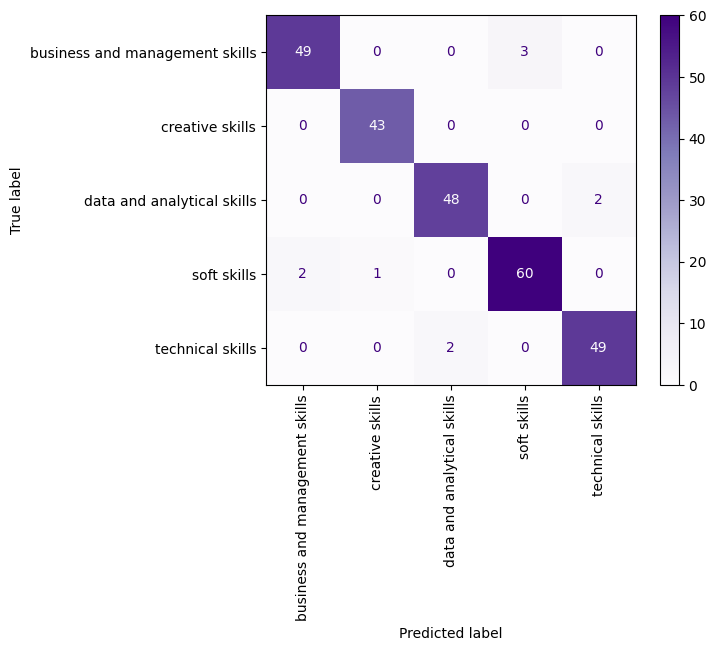

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_svm = svm_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred_svm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap="Purples", xticks_rotation="vertical")


### Observing **any misclassifications**

In [33]:
misclassified_indices = (y_test != y_pred_svm)

misclassified_df = pd.DataFrame({
    "Actual": y_test[misclassified_indices].values,
    "Predicted": y_pred_svm[misclassified_indices]
})

misclassified_df.head(10)


,Actual,Predicted
0,business and management skills,soft skills
1,business and management skills,soft skills
2,data and analytical skills,technical skills
3,data and analytical skills,technical skills
4,soft skills,creative skills
5,soft skills,business and management skills
6,business and management skills,soft skills
7,technical skills,data and analytical skills
8,soft skills,business and management skills
9,technical skills,data and analytical skills


In [34]:
misclassified_counts = misclassified_df.groupby("Actual").size().reset_index(name="Misclassified Count")
misclassified_counts

,Actual,Misclassified Count
0,business and management skills,3
1,data and analytical skills,2
2,soft skills,3
3,technical skills,2


<ipython-input-35-32c534330455>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=misclassified_df["Actual"], order=misclassified_df["Actual"].value_counts().index, palette="coolwarm")


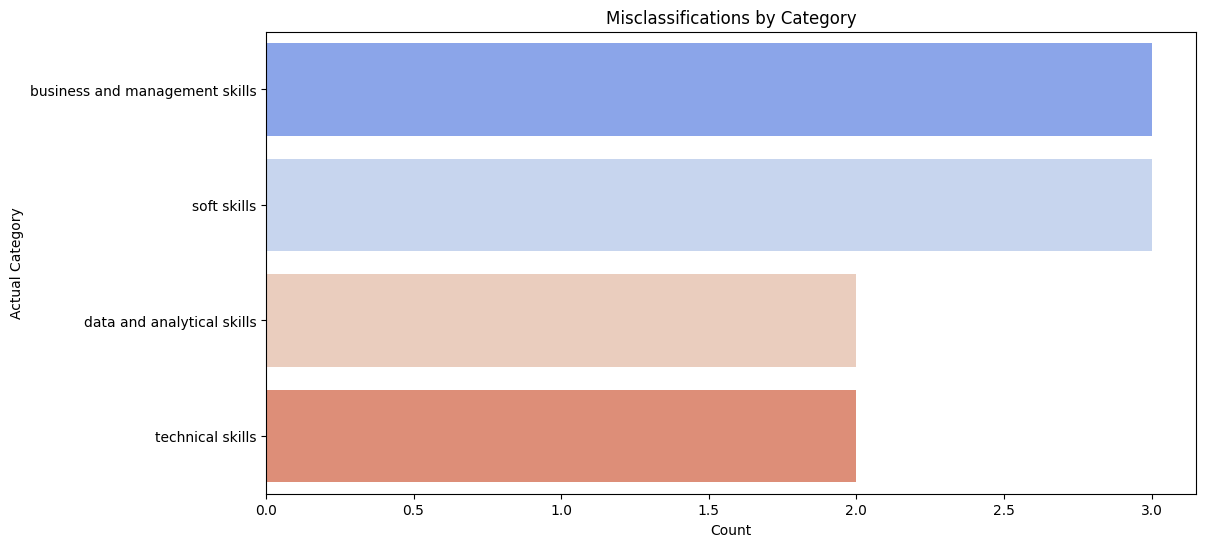

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(y=misclassified_df["Actual"], order=misclassified_df["Actual"].value_counts().index, palette="coolwarm")
plt.title("Misclassifications by Category")
plt.xlabel("Count")
plt.ylabel("Actual Category")
plt.show()

### Trying to Optimize SVM by **Hyperparameter Tuning**

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_ * 100)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best Accuracy: 96.2342066146414


### **Classification Report** after Tuning

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred_svm))

                                precision    recall  f1-score   support

business and management skills       0.96      0.94      0.95        52
               creative skills       0.98      1.00      0.99        43
    data and analytical skills       0.96      0.96      0.96        50
                   soft skills       0.95      0.95      0.95        63
              technical skills       0.96      0.96      0.96        51

                      accuracy                           0.96       259
                     macro avg       0.96      0.96      0.96       259
                  weighted avg       0.96      0.96      0.96       259



### Generating **confusion matrix**

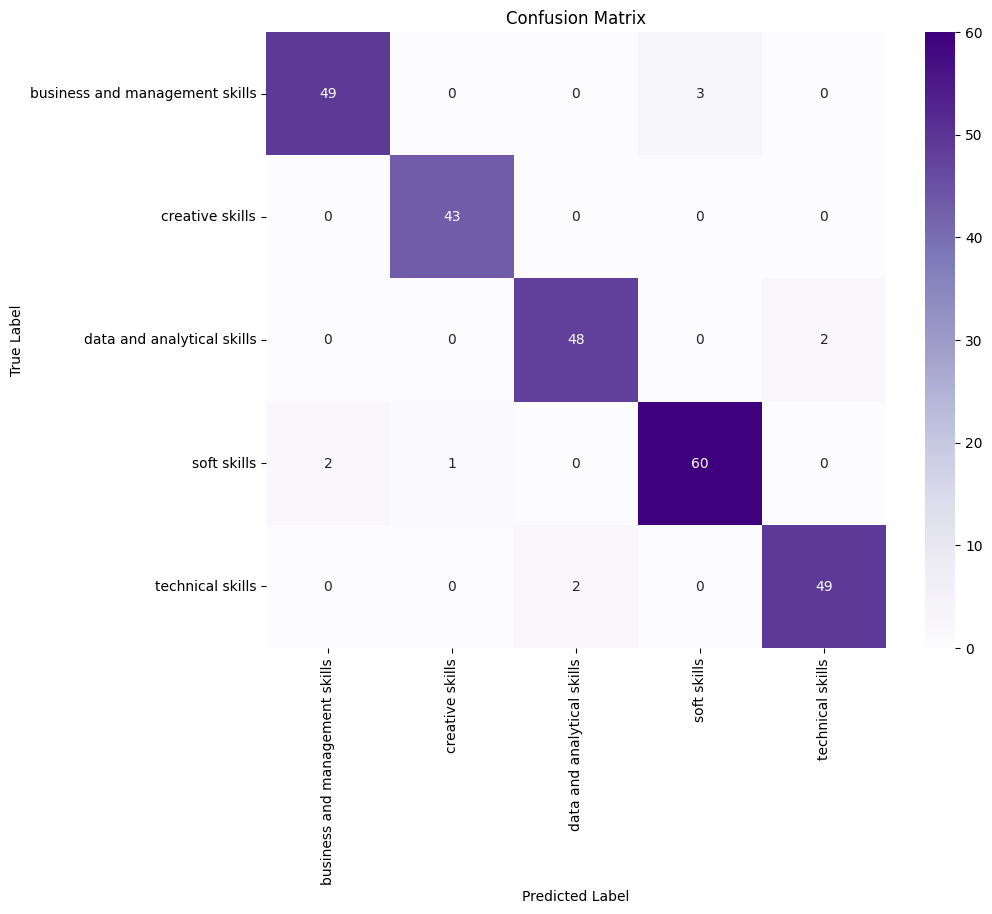

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

cm = confusion_matrix(y_test, y_pred_svm)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### **Trying to Categorize Skills Dynamically**

In [39]:
predefined_categories = list(df['category'].unique())
predefined_categories
skills = df['skill'].unique()

In [40]:
X_train = df['skill']
y_train = df['category']

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

svm_model = SVC(probability=True, kernel='linear', random_state=42)
svm_model.fit(X_train_vectorized, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [41]:
def predict_category(skill_name, threshold=0.5):
    skill_vector = vectorizer.transform([skill_name])

    probabilities = svm_model.predict_proba(skill_vector)[0]
    max_prob = max(probabilities)
    predicted_label = np.argmax(probabilities)
    if max_prob < threshold:
        return "Unknown"
    return label_encoder.inverse_transform([predicted_label])[0]


In [42]:
def assign_unknown_category_name(skill):
    skill = skill.lower()

    # Defining some keyword-based mappings
    category_mappings = {
        "ai": "Data and AI Skills",
        "ml": "Data and AI Skills",
        "cloud": "Technical Skills",
        "software": "Technical Skills",
        "design": "Creative Skills",
        "marketing": "Business & Management Skills",
        "leadership": "Business & Management Skills",
        "finance": "Business & Management Skills",
        "project": "Business & Management Skills",
        "health": "Healthcare & Life Sciences",
        "biotech": "Healthcare & Life Sciences",
        "law": "Legal & Compliance",
        "risk": "Legal & Compliance",
    }

    for keyword, category in category_mappings.items():
        if keyword in skill:
            return category
    return f"New Category: {skill.title()}"

In [43]:
import numpy as np

def categorize_skills_dynamic(skills, predefined_categories, model):
    df = pd.DataFrame(np.zeros((len(skills), len(predefined_categories))), columns=predefined_categories)

    dynamic_categories = predefined_categories.copy()

    for i, skill in enumerate(skills):
        predicted_category = predict_category(skill)

        if predicted_category == "Unknown":
            believable_category = assign_unknown_category_name(skill)

            if believable_category not in df.columns:
                df[believable_category] = 0
                dynamic_categories.append(believable_category)

            df.at[i, believable_category] = 1
        else:
            df.at[i, predicted_category] = 1

    df.insert(0, "Skill", skills)

    return df, dynamic_categories

### **Saving our model**

In [45]:
import joblib

joblib.dump(svm_model, "skill_categorization_model.pkl")

joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

joblib.dump(label_encoder, "label_encoder.pkl")

print("Model, Vectorizer, and Label Encoder saved successfully!")


Model, Vectorizer, and Label Encoder saved successfully!


In [48]:
loaded_model = joblib.load("skill_categorization_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")
loaded_label_encoder = joblib.load("label_encoder.pkl")

print("Loaded Model and Components Successfully!")


Loaded Model and Components Successfully!


In [59]:
import pickle

with open("skill_model.pkl", "wb") as model_file:
    pickle.dump(svm_model, model_file)

with open("vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

from google.colab import files
files.download("skill_model.pkl")
files.download("vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Testing our model**

In [63]:
skills_input = ["Python", "Data Analysis", "JavaScript", "Machine Learning", "Singing", "Risk Management", "Cloud Computing", "Biotech Research", "Reading", "Human Resource"]

categorized_df, dynamic_categories = categorize_skills_dynamic(skills_input, predefined_categories, predict_category)

categorized_df

,Skill,creative skills,data and analytical skills,soft skills,business and management skills,technical skills,New Category: Singing,New Category: Reading
0,Python,0.0,0.0,0.0,0.0,1.0,0,0
1,Data Analysis,0.0,1.0,0.0,0.0,0.0,0,0
2,JavaScript,0.0,0.0,0.0,0.0,1.0,0,0
3,Machine Learning,0.0,1.0,0.0,0.0,0.0,0,0
4,Singing,0.0,0.0,0.0,0.0,0.0,1,0
5,Risk Management,0.0,0.0,0.0,1.0,0.0,0,0
6,Cloud Computing,0.0,0.0,0.0,0.0,1.0,0,0
7,Biotech Research,0.0,0.0,0.0,1.0,0.0,0,0
8,Reading,0.0,0.0,0.0,0.0,0.0,0,1
9,Human Resource,0.0,0.0,0.0,1.0,0.0,0,0


## **Conclusion: Our model now predicts skill categories and also dynamically classifies skills into seperate columns for those which it does not recognize**

### ***For some reason the dynamic categorization for unrecognised skills does not work in the API. But it does in the code here..please verify for your surity.***

### ***Please Ignore: Debugging Code***

In [46]:
print(svm_model.predict_proba(vectorizer.transform(['Uncommon Skill'])))

[[0.11887487 0.1363478  0.09875933 0.30118616 0.34483185]]


In [47]:
print(predict_category("Uncommon Skill"))
print(predict_category("Python"))

Unknown
technical skills
